In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [30]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_tab = skills_count.reset_index(name='skills_count')
skills_tab = skills_tab.sort_values(by='skills_count', ascending=False)
job_title =['Data Analyst', 'Data Engineer', 'Data Scientist']
nb_skills=5
skills_list=[0,1,2]

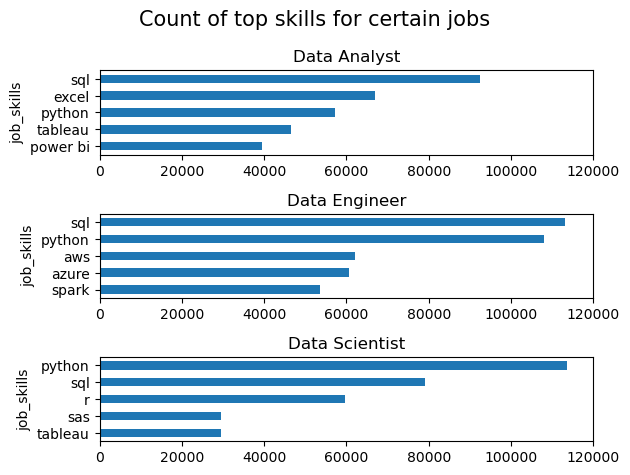

In [31]:
fig, ax = plt.subplots(3,1)
for i in range(0, len(job_title)):
    df_plot = skills_tab[skills_tab['job_title_short']==job_title[i]].head(nb_skills)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title= job_title[i])
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Count of top skills for certain jobs', fontsize=15)
plt.tight_layout()